# Downloading information from WRDS for the company *FrieslandCampina*

### The data is from Bureau van Dijk(BvD)'s database Amadeus, concerning only European companies

* Link to the Wharton's website: [WRDS](https://wrds-web.wharton.upenn.edu/wrds/)


In [2]:
import wrds
import pandas as pd
from sqlalchemy import create_engine, text

#establishing connection
db = wrds.Connection(wrds_username ='tycho1')

Loading library list...
Done


In [3]:
db.list_libraries()

['public',
 'wrds_lib_internal',
 'centris',
 'gsi',
 'rent',
 'wrdsapps',
 'wrdsapps_evtravtaq',
 'wrdsapps_finratios',
 'eureka',
 'ims',
 'ktmine',
 'secsamp_all_new',
 'compnad',
 'twoiq',
 'frb_all_new',
 'ginsight',
 'crsp_a_ziman',
 'crsp_q_ziman',
 'blab',
 'lspd',
 'ravenpack_trial',
 'optionmsamp_us',
 'optionmsamp_europe',
 'ff_all_new',
 'crsp_a_ccm',
 'crsp_a_indexes',
 'crsp_a_stock',
 'crsp_q_ccm',
 'crsp_q_indexes',
 'trws',
 'crsp_q_stock',
 'bvd_osiris',
 'risk_governance',
 'secsamp',
 'levin',
 'risk_directors',
 'tass',
 'hfr',
 'ims_obp_trial',
 'macrofin_comm_trade',
 'comp_segments_hist',
 'audit_audit_comp',
 'infogroupsamp_business',
 'infogroupsamp_residential',
 'compm',
 'ktmine_patents_samp',
 'macrofin',
 'crspa',
 'boardex_trial',
 'comp_bank',
 'compb',
 'snlsamp_fig',
 'ftse',
 'audit',
 'etfg_samp',
 'csmar',
 'etfgsamp',
 'dealscan',
 'bvd_ama_large',
 'compa',
 'bvd_ama_small',
 'bvd_ama_medium',
 'bvd_ama_verylarge',
 'tr_ibes',
 'compsamp_snapshot

In [4]:
db.list_tables('bvd')

['osiris_qvards',
 'os_activ_asicuscde',
 'os_activ_ftinclas',
 'os_activ_nace2scde',
 'os_activ_nacescde',
 'os_activ_naics12cde',
 'os_activ_paics12cod',
 'os_activ_pnace2cd',
 'os_activ_pnacecd',
 'os_activ_psicuscde',
 'os_do',
 'os_fin_bnk',
 'os_fin_ind',
 'os_fin_ins',
 'os_gen',
 'os_gen_advisor',
 'os_gen_manager',
 'os_io',
 'os_shh',
 'os_stock_exchanges',
 'os_stock_header',
 'os_stock_indexes',
 'os_stock_monthly',
 'os_stock_ratios',
 'os_stock_weekly',
 'os_sub',
 'os_uo',
 'bankscope_qvards',
 'bs_bank',
 'bs_companions',
 'bs_directors',
 'bs_financials',
 'bs_ish_guo_duo',
 'bs_overview',
 'bs_shareholders',
 'bs_stock_annual',
 'bs_stock_current',
 'bs_stock_indexes',
 'bs_stock_info',
 'bs_stock_monthly',
 'bs_stock_places',
 'bs_stock_weekly',
 'bs_subsidiaries',
 'is_alsoknown',
 'is_auditors',
 'is_duo',
 'is_fin_com',
 'is_fin_lif',
 'is_fin_nl',
 'is_formerknown',
 'is_gen',
 'is_io',
 'is_managers',
 'is_ownhdr',
 'is_shh',
 'is_stock_exchanges',
 'is_stock_he

In [6]:
db.describe_table(library='bvd', table='financials_l')

Approximately 3529400 rows in bvd.financials_l.


,name,nullable,type
0,idnr,True,VARCHAR(15)
1,country,True,VARCHAR(22)
2,repbas,True,VARCHAR(24)
3,closdate,True,DATE
4,closdate_year,True,DOUBLE PRECISION
5,accpra,True,VARCHAR(10)
6,months,True,DOUBLE PRECISION
7,unit,True,DOUBLE PRECISION
8,currency,True,VARCHAR(3)
9,exchrate,True,DOUBLE PRECISION


In [7]:
#downloading small companies
dfFriesland_s = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_s as bf  \
                                 INNER JOIN bvd.company_s as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [8]:
#downloading medium size companies
dfFriesland_m = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_m as bf  \
                                 INNER JOIN bvd.company_m as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [9]:
#downloading large size companies
dfFriesland_l = db.raw_sql(text("SELECT *, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_l as bf  \
                                 INNER JOIN bvd.company_l as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [10]:
#downloading very large size companies
dfFriesland_v = db.raw_sql(text("SELECT bf.*,bc.*, \
                                 REPLACE(bc.name,'FRIESLANDCAMPINA','FRICAMP') AS name_short \
                                 FROM bvd.financials_v as bf  \
                                 INNER JOIN bvd.company_v as bc \
                                 ON bf.idnr = bc.idnr \
                                 WHERE bc.name LIKE '%FRIESLANDCAMPINA%' ; "))

In [11]:
#the names of the companies
dfFriesland_names = db.raw_sql(text("SELECT bc.name, bc.idnr \
                                    FROM bvd.company_l as bc \
                                    WHERE bc.name LIKE 'FRIESLANDCAMPINA%' ; "))

In [12]:
dfFriesland_names

,name,idnr
0,FRIESLANDCAMPINA AUSTRIA GMBH,AT9030036068
1,FRIESLANDCAMPINA BELGIUM CHEESE,BE0419250133
2,FRIESLANDCAMPINA BREE,BE0478547322
3,FRIESLANDCAMPINA,BE0478847725
4,FRIESLANDCAMPINA CANARIAS SA,ESA35005685
5,FRIESLANDCAMPINA IBERIA SL,ESB63544134
6,FRIESLANDCAMPINA UK LIMITED,GB04684097
7,FRIESLANDCAMPINA HUNGARIA KERESKEDELMI ES TERM...,HU12876992
8,FRIESLANDCAMPINA ITALY S.R.L.,IT07338171007
9,FRIESLANDCAMPINA ROMANIA S.A.,RO6632642


In [13]:
# combining the 4 dataframes into one
df = dfFriesland_s.append(dfFriesland_m)
df = df.append(dfFriesland_l)
df = df.append(dfFriesland_v)

In [ ]:
df.to_csv(r'Dropbox/mytest.csv') #saving to csv file

In [34]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

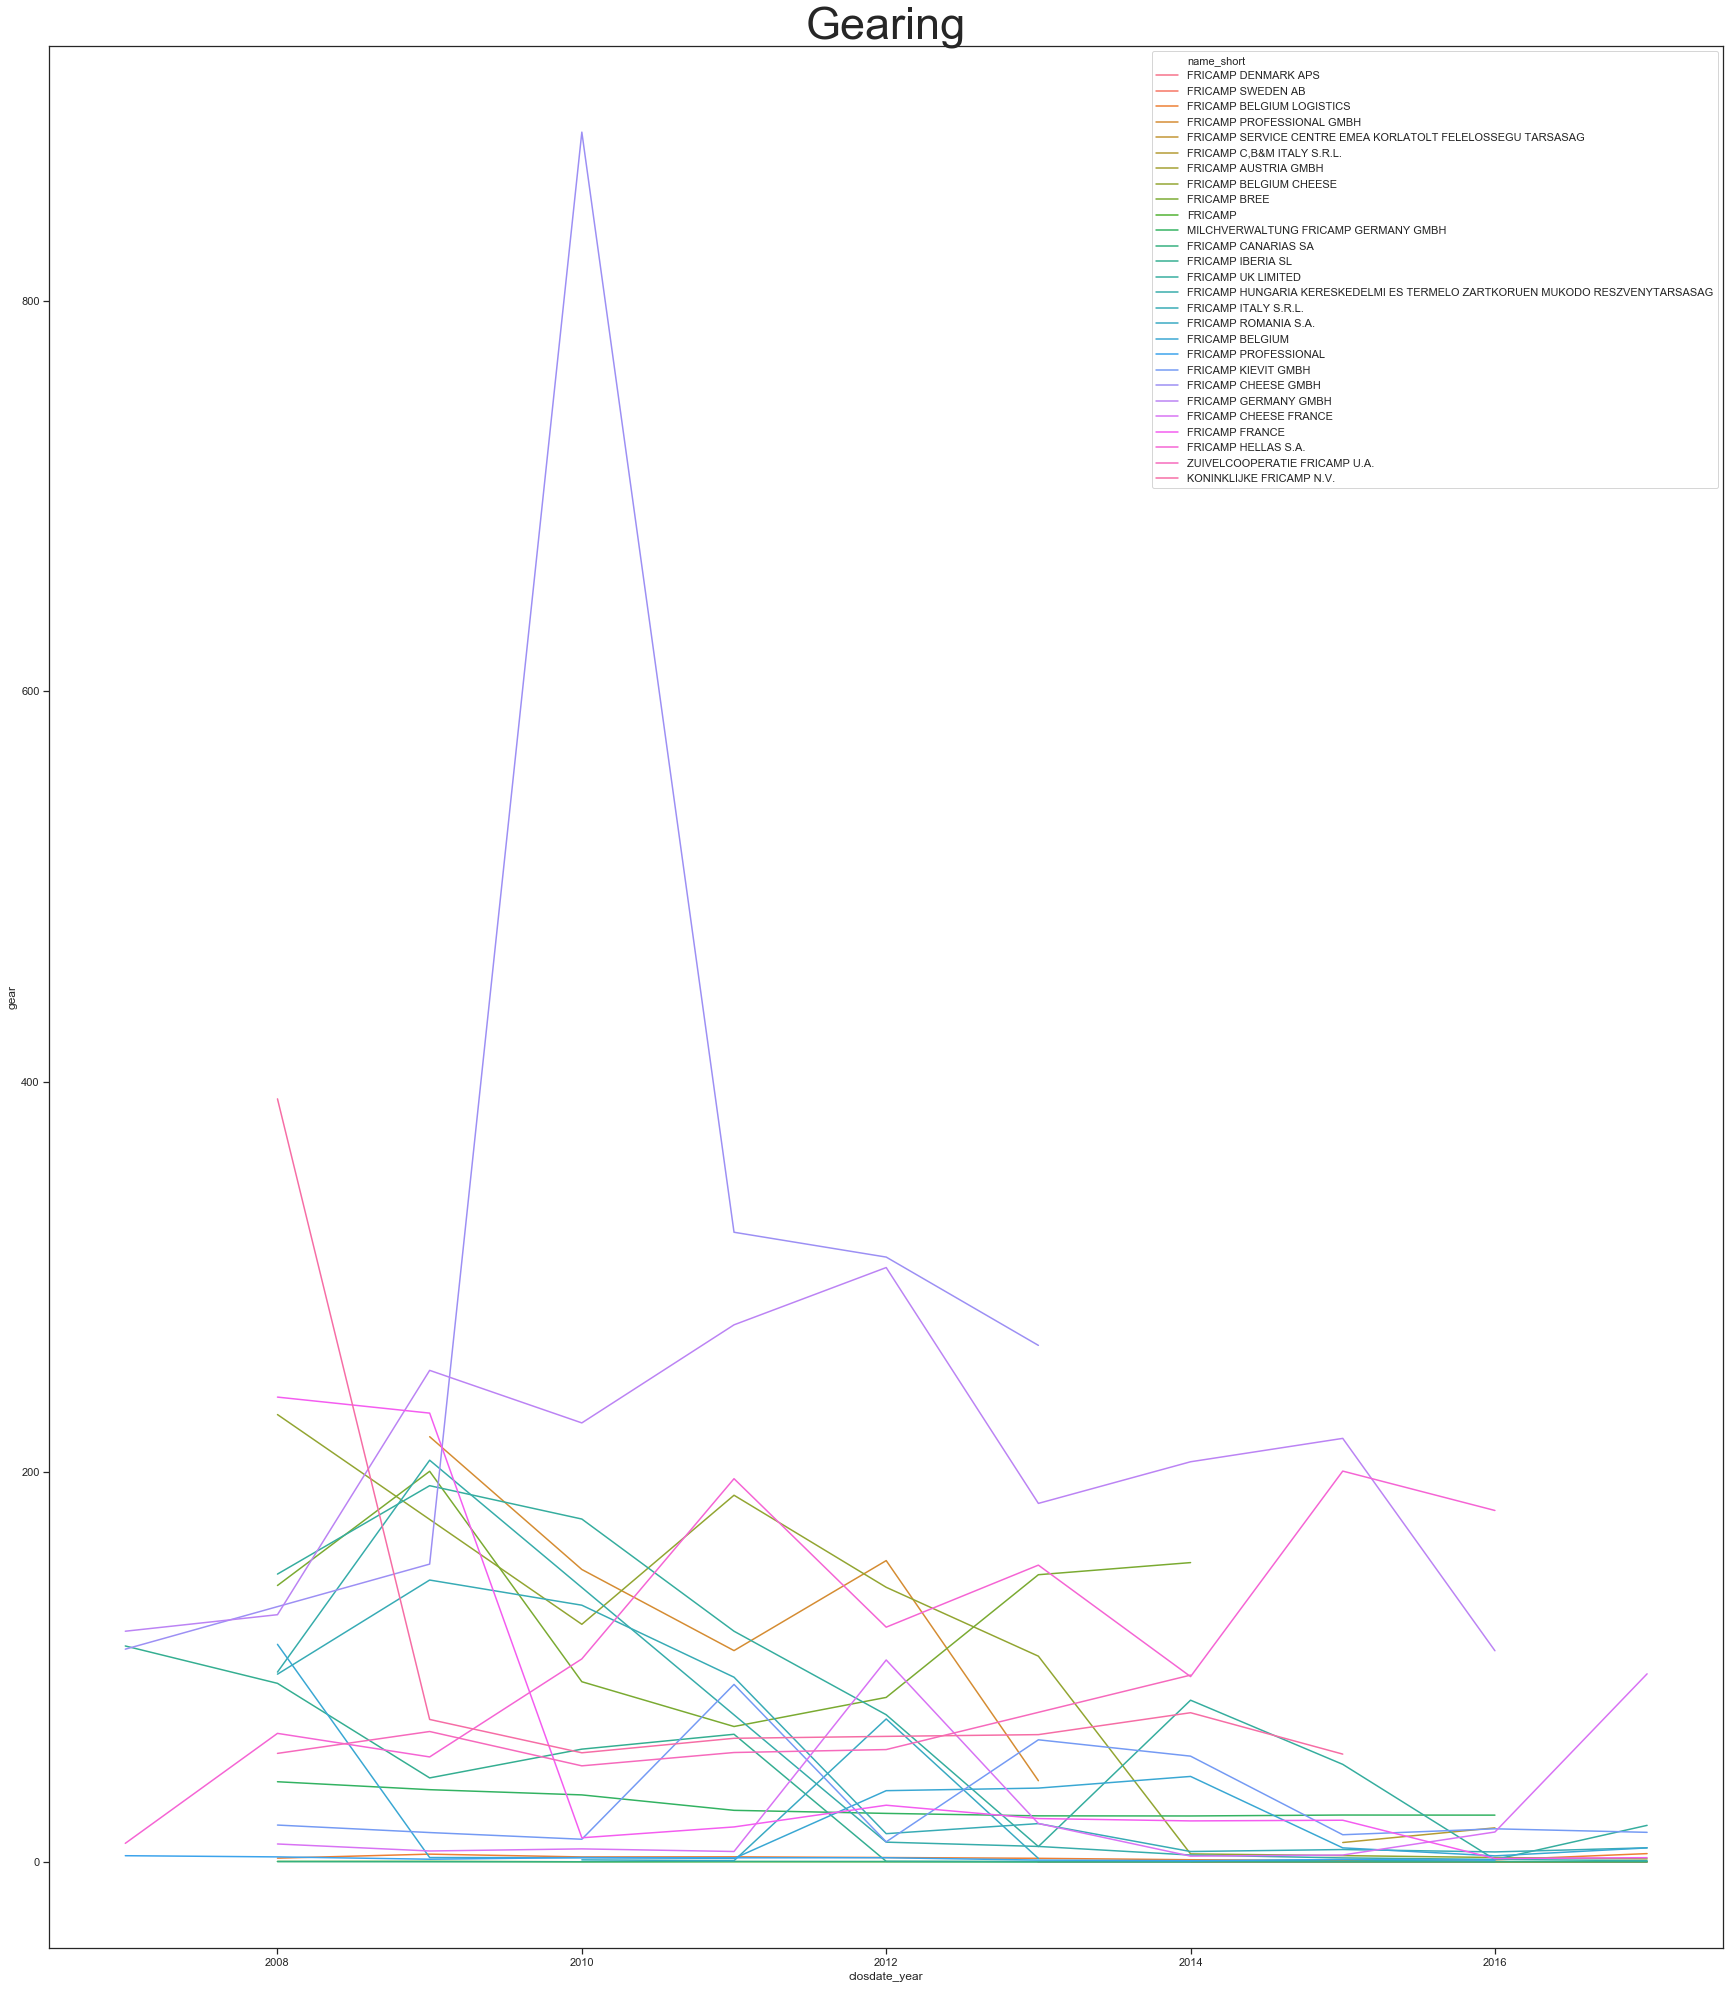

In [62]:
g1 = sns.lineplot(x="closdate_year",y="gear",hue="name_short",
             data = df[["closdate_year","gear","name_short"]].dropna()) \
             .set_title("Gearing", fontsize = 45)
plt.rcParams['figure.figsize']=(30,35)

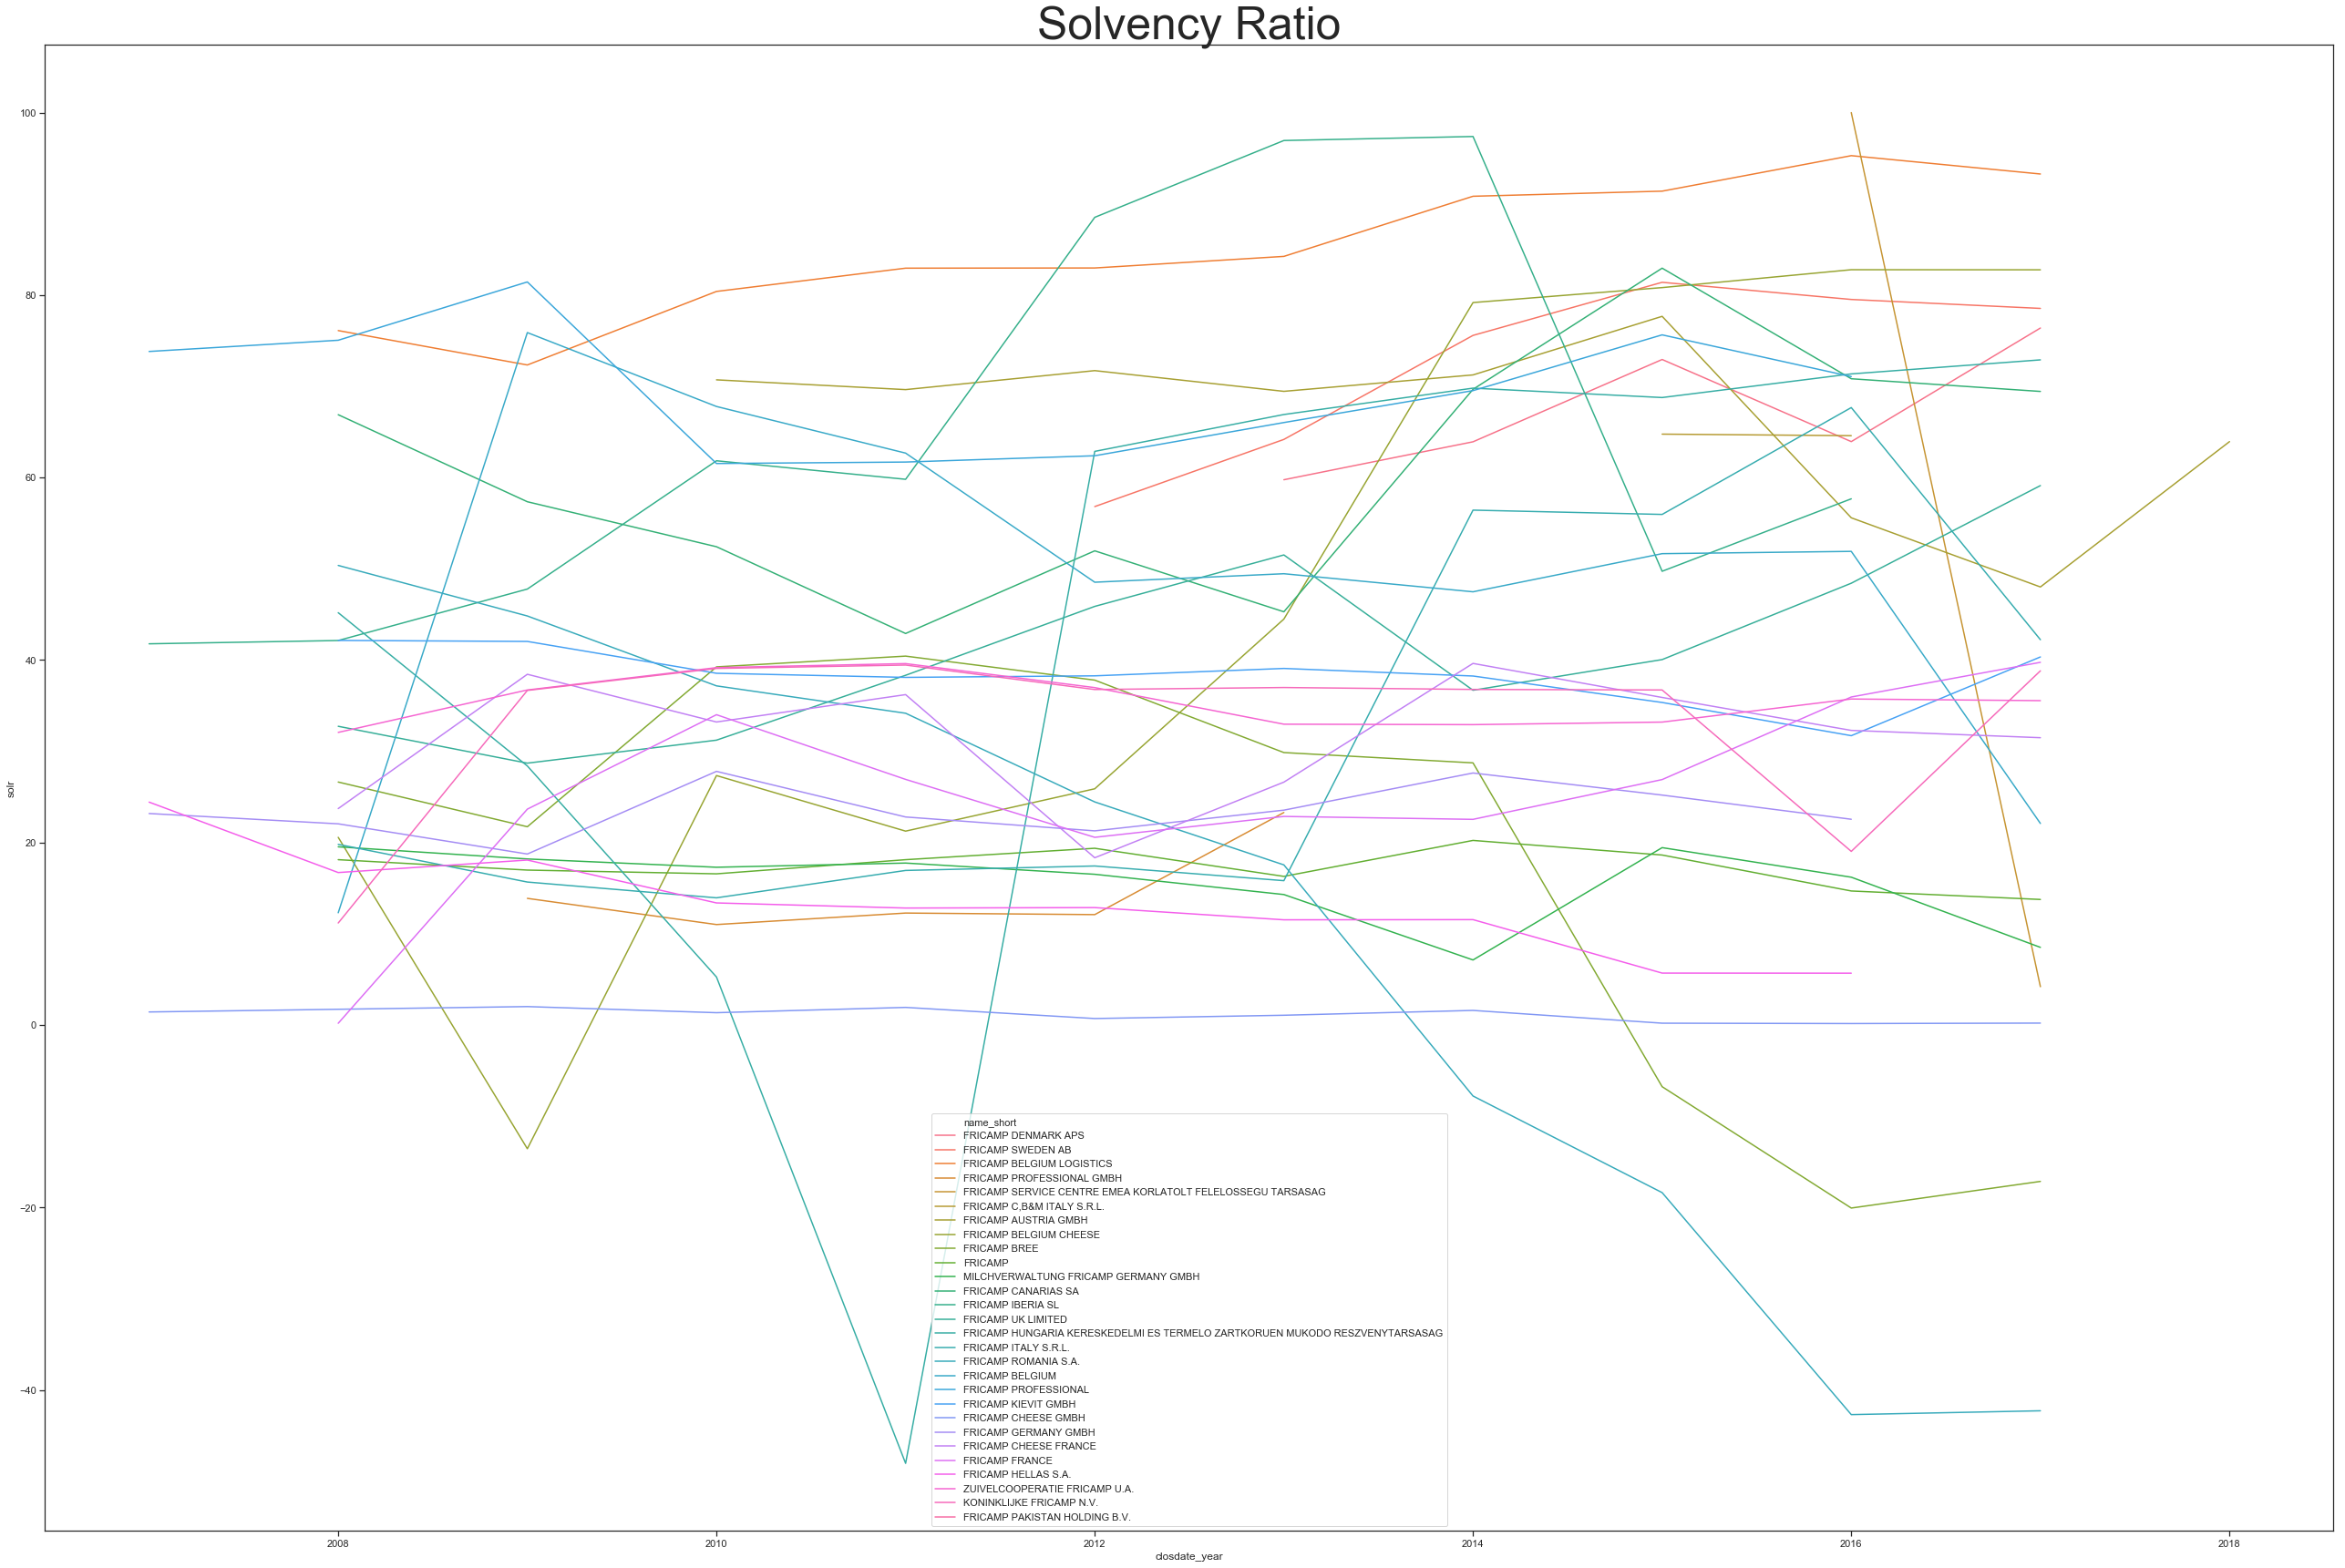

In [67]:
g = sns.lineplot(x="closdate_year",y="solr",hue="name_short",
                 data = df[["closdate_year","solr","name_short"]].dropna()) \
                 .set_title("Solvency Ratio",fontsize =50)
    
#g.set_fontsize(20)
plt.rcParams['figure.figsize']=(45,30)


### Here is a link to a Tableau Story/Dashboard with analysis of the data downloaded in this notebook

[link to Tableau](https://public.tableau.com/profile/tihomir7992#!/vizhome/FrieslandCampina_subsidiaries_Europe/Story1)